<a href="https://colab.research.google.com/github/jman19/ML_Imaging/blob/master/BuildingClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building Image classifier

**Author: Jason** 



The goal of this model is to classify buildings in my university campus. The hope was that a new student who was lost could take a photo using thier phone of a building on campus and have the model tell them what building it is so they would know exactly where they where.

# Discussion of Solution

I decided to use a majority vote system since I was unable to get any   indivual model up to the accuracy I wanted without overfitting. By using this method I'm able to offset weakness of an individual model and help cancel out bias of any individual model

I split my data using holdout in a standard train test split 75% for train 25% for test

I used transfer learning for each base-model by removing the top and replaceing it with a custom output layer fitted to the 16 classes of buildings. I trained each base-model using data augmentation to improve generalization

I estimated future performance by creating a test which feeds my model every image avaliable since these images are non augmented it's similar to fresh images for the model. I then print the classification report which has average accuracy, recall and precision of each building class the model was able to produce

   **Here are our final predictions:**
   1. Building with worst recall: MC
   2. Building with best precision: MC
   3. Overall accuracy: 68%
 

The building that it did the best on would be FH since it has high recall as well as high precision the reason I feel that it did well on this is since no other building resembles the field house and it has a similar feature pattern from all angles. 

The building it did poorly on would be between CB and RB they both have poor precision and recall this is likely because these buildings are very different from different sides and they look similar on certain sides to each other causing false classifications.

I would have liked to investigate more into weighted voting since not all the base models achived the same accuracy some are better then others and their vote should likely have been weighted higher. I would have also liked to investigate how to load more models faster since I was forced to not include as many base models due to load time resistraints

# Code to Train models

In [0]:
from glob import glob
import os
from sklearn.model_selection import train_test_split
from shutil import copyfile

# Load data from...
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
if os.path.exists("train"):
  os.system("rm -rf train")

if os.path.exists("test"):
  os.system("rm -rf test")
  
os.makedirs("train/AA")
os.makedirs("train/CB")
os.makedirs("train/CT")
os.makedirs("train/DT")
os.makedirs("train/FH")
os.makedirs("train/HP")
os.makedirs("train/HS")
os.makedirs("train/LB")
os.makedirs("train/MC")
os.makedirs("train/ME")
os.makedirs("train/ML")
os.makedirs("train/PA")
os.makedirs("train/RB")
os.makedirs("train/RO")
os.makedirs("train/SA")
os.makedirs("train/TB")

os.makedirs("test/AA")
os.makedirs("test/CB")
os.makedirs("test/CT")
os.makedirs("test/DT")
os.makedirs("test/FH")
os.makedirs("test/HP")
os.makedirs("test/HS")
os.makedirs("test/LB")
os.makedirs("test/MC")
os.makedirs("test/ME")
os.makedirs("test/ML")
os.makedirs("test/PA")
os.makedirs("test/RB")
os.makedirs("test/RO")
os.makedirs("test/SA")
os.makedirs("test/TB")

#populate train and test folders
buildingCodes = ('AA', 'CB', 'CT', 'DT', 'FH', 'HP', 'HS', 'LB', 'MC', 'ME', 'ML', 'PA', 'RB', 'RO', 'SA', 'TB')
sources=["/content/drive/My Drive/Colab Notebooks/All_Images_500x500/All_Images_500x500/AA/*.jpg",
         "/content/drive/My Drive/Colab Notebooks/All_Images_500x500/All_Images_500x500/CB/*.jpg",
         "/content/drive/My Drive/Colab Notebooks/All_Images_500x500/All_Images_500x500/CT/*.jpg",
         "/content/drive/My Drive/Colab Notebooks/All_Images_500x500/All_Images_500x500/DT/*.jpg",
         "/content/drive/My Drive/Colab Notebooks/All_Images_500x500/All_Images_500x500/FH/*.jpg",
         "/content/drive/My Drive/Colab Notebooks/All_Images_500x500/All_Images_500x500/HP/*.jpg",
         "/content/drive/My Drive/Colab Notebooks/All_Images_500x500/All_Images_500x500/HS/*.jpg",
         "/content/drive/My Drive/Colab Notebooks/All_Images_500x500/All_Images_500x500/LB/*.jpg",
         "/content/drive/My Drive/Colab Notebooks/All_Images_500x500/All_Images_500x500/MC/*.jpg",
         "/content/drive/My Drive/Colab Notebooks/All_Images_500x500/All_Images_500x500/ME/*.jpg",
         "/content/drive/My Drive/Colab Notebooks/All_Images_500x500/All_Images_500x500/ML/*.jpg",
         "/content/drive/My Drive/Colab Notebooks/All_Images_500x500/All_Images_500x500/PA/*.jpg",
         "/content/drive/My Drive/Colab Notebooks/All_Images_500x500/All_Images_500x500/RB/*.jpg",
         "/content/drive/My Drive/Colab Notebooks/All_Images_500x500/All_Images_500x500/RO/*.jpg",
         "/content/drive/My Drive/Colab Notebooks/All_Images_500x500/All_Images_500x500/SA/*.jpg",
         "/content/drive/My Drive/Colab Notebooks/All_Images_500x500/All_Images_500x500/TB/*.jpg"]

destTrain=["train/AA","train/CB","train/CT","train/DT","train/FH","train/HP",
           "train/HS","train/LB","train/MC","train/ME","train/ML","train/PA",
           "train/RB","train/RO","train/SA","train/TB"]
destTest=["test/AA","test/CB","test/CT","test/DT","test/FH","test/HP","test/HS",
          "test/LB","test/MC","test/ME","test/ML","test/PA","test/RB","test/RO",
          "test/SA","test/TB"]

for i in range(len(sources)):
  pics=glob(sources[i])
  Label=[buildingCodes[i]]*len(pics)
  
  pics_train, pics_test, pics_label_train, pics_label_test = train_test_split(pics, Label, test_size = 0.25)

  for tr in range(len(pics_train)):
    copyfile(pics_train[tr], destTrain[i]+"/"+str(tr)+".jpg")

  for te in range(len(pics_test)):
    copyfile(pics_test[te], destTest[i]+"/"+str(te)+".jpg")



Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


##Step N: Save the model to file

In [0]:
# Whatever code is required to save your trained model to a file. 
# Should be re-loaded by prepareModel() during testing.
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.applications.inception_v3 import InceptionV3
import keras.applications.inception_v3
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.xception import Xception
import keras.applications.xception
from keras.applications.vgg16 import VGG16
import keras.applications.vgg16
from keras.applications.nasnet import NASNetLarge
import keras.applications.nasnet
from keras.applications.densenet import DenseNet201
import keras.applications.densenet
from keras.applications.resnet_v2 import ResNet152V2
import keras.applications.resnet_v2

import matplotlib.pyplot as plt

CLASSES = 16


# Load base models with top removed

#========================================================
# custom output layer
base_model=InceptionV3(weights='imagenet',include_top=False)
new_model=base_model.output
new_model=GlobalAveragePooling2D(name='avg_pool')(new_model)
new_model = Dropout(0.5)(new_model)
predictions = Dense(CLASSES, activation='softmax')(new_model)

modelInception = Model(inputs=base_model.input, outputs=predictions)
#freeze base model layers they will not be retrained
for layer in base_model.layers:
    layer.trainable = False

modelInception.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
#==============================================
# custom output layer
base_model=Xception(weights='imagenet',include_top=False)
new_model=base_model.output
new_model=GlobalAveragePooling2D(name='avg_pool')(new_model)
new_model = Dropout(0.5)(new_model)
predictions = Dense(CLASSES, activation='softmax')(new_model)

modelXception= Model(inputs=base_model.input, outputs=predictions)
#freeze base model layers they will not be retrained
for layer in base_model.layers:
    layer.trainable = False

modelXception.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
#===============================================
# custom output layer
base_model=VGG16(weights='imagenet',include_top=False)
new_model=base_model.output
new_model=GlobalAveragePooling2D(name='avg_pool')(new_model)
new_model = Dropout(0.5)(new_model)
predictions = Dense(CLASSES, activation='softmax')(new_model)

modelVGG16=Model(inputs=base_model.input, outputs=predictions)
#freeze base model layers they will not be retrained
for layer in base_model.layers:
    layer.trainable = False

modelVGG16.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
#==============================================
# custom output layer
base_model=NASNetLarge(weights='imagenet',include_top=False)
new_model=base_model.output
new_model=GlobalAveragePooling2D(name='avg_pool')(new_model)
new_model = Dropout(0.5)(new_model)
predictions = Dense(CLASSES, activation='softmax')(new_model)

modelNASNET=Model(inputs=base_model.input, outputs=predictions)
#freeze base model layers they will not be retrained
for layer in base_model.layers:
    layer.trainable = False

modelNASNET.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
#===========================================
# custom output layer
base_model=DenseNet201(weights='imagenet',include_top=False)
new_model=base_model.output
new_model=GlobalAveragePooling2D(name='avg_pool')(new_model)
new_model = Dropout(0.5)(new_model)
predictions = Dense(CLASSES, activation='softmax')(new_model)

modelDenseNet=Model(inputs=base_model.input, outputs=predictions)
#freeze base model layers they will not be retrained
for layer in base_model.layers:
    layer.trainable = False
modelDenseNet.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
#========================================
# custom output layer
base_model=ResNet152V2(weights='imagenet',include_top=False)
new_model=base_model.output
new_model=GlobalAveragePooling2D(name='avg_pool')(new_model)
new_model = Dropout(0.5)(new_model)
predictions = Dense(CLASSES, activation='softmax')(new_model)

modelResNET=Model(inputs=base_model.input, outputs=predictions)
#freeze base model layers they will not be retrained
for layer in base_model.layers:
    layer.trainable = False

modelResNET.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
#=========================================
TRAIN_DIR = 'train'
TEST_DIR = 'test'
#=========================================================
# data prep Inception
#===========================================================
train_datagen = ImageDataGenerator(
    preprocessing_function=keras.applications.inception_v3.preprocess_input,
    height_shift_range=0.3,
    width_shift_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(
    preprocessing_function=keras.applications.inception_v3.preprocess_input,
    height_shift_range=0.3,
    width_shift_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical'
)
#===============================================================
#data prep Xception
#==============================================
train_datagen_Xception = ImageDataGenerator(
    preprocessing_function=keras.applications.xception.preprocess_input,
    height_shift_range=0.3,
    width_shift_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen_Xception = ImageDataGenerator(
    preprocessing_function=keras.applications.xception.preprocess_input,
    height_shift_range=0.3,
    width_shift_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator_Xception = train_datagen_Xception.flow_from_directory(
    TRAIN_DIR,
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical'
)

validation_generator_Xception = validation_datagen_Xception.flow_from_directory(
    TEST_DIR,
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical'
)
#===========================================================
# data prep VGG16
#=======================================================
train_datagen_VGG16 = ImageDataGenerator(
    preprocessing_function=keras.applications.vgg16.preprocess_input,
    height_shift_range=0.3,
    width_shift_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen_VGG16 = ImageDataGenerator(
    preprocessing_function=keras.applications.vgg16.preprocess_input,
    height_shift_range=0.3,
    width_shift_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator_VGG16 = train_datagen_VGG16.flow_from_directory(
    TRAIN_DIR,
    target_size=(244, 244),
    batch_size=32,
    class_mode='categorical'
)

validation_generator_VGG16 = validation_datagen_VGG16.flow_from_directory(
    TEST_DIR,
    target_size=(244, 244),
    batch_size=32,
    class_mode='categorical'
)
#===================================================
# Data prep NASNET
#==================================================
train_datagen_NASNET = ImageDataGenerator(
    preprocessing_function=keras.applications.nasnet.preprocess_input,
    height_shift_range=0.3,
    width_shift_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen_NASNET = ImageDataGenerator(
    preprocessing_function=keras.applications.nasnet.preprocess_input,
    height_shift_range=0.3,
    width_shift_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator_NASNET = train_datagen_NASNET.flow_from_directory(
    TRAIN_DIR,
    target_size=(331, 331),
    batch_size=32,
    class_mode='categorical'
)

validation_generator_NASNET = validation_datagen_NASNET.flow_from_directory(
    TEST_DIR,
    target_size=(331, 331),
    batch_size=32,
    class_mode='categorical'
)
#=====================================================
# Data prep DenseNet
#=====================================================
train_datagen_DenseNet = ImageDataGenerator(
    preprocessing_function=keras.applications.densenet.preprocess_input,
    height_shift_range=0.3,
    width_shift_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen_DenseNet = ImageDataGenerator(
    preprocessing_function=keras.applications.densenet.preprocess_input,
    height_shift_range=0.3,
    width_shift_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator_DenseNet = train_datagen_DenseNet.flow_from_directory(
    TRAIN_DIR,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator_DenseNet = validation_datagen_DenseNet.flow_from_directory(
    TEST_DIR,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)
#=====================================================
# data prep ResNET
#=====================================================
train_datagen_ResNET = ImageDataGenerator(
    preprocessing_function=keras.applications.resnet_v2.preprocess_input,
    height_shift_range=0.3,
    width_shift_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen_ResNET = ImageDataGenerator(
    preprocessing_function=keras.applications.resnet_v2.preprocess_input,
    height_shift_range=0.3,
    width_shift_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator_ResNET = train_datagen_ResNET.flow_from_directory(
    TRAIN_DIR,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator_ResNET = validation_datagen_ResNET.flow_from_directory(
    TEST_DIR,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)
#====================================================
EPOCHS = 250
BATCH_SIZE = 32
STEPS_PER_EPOCH = 3
VALIDATION_STEPS = 1

#===============================================
#train and save inception
#===============================================
history =modelInception.fit_generator(
    train_generator,
    epochs=EPOCHS,
    steps_per_epoch=STEPS_PER_EPOCH,
    validation_data=validation_generator,
    validation_steps=VALIDATION_STEPS)
  
modelInception.save("InceptionV3")
#=========================================
# train and save Xception
#=========================================
history =modelXception.fit_generator(
    train_generator_Xception,
    epochs=EPOCHS,
    steps_per_epoch=STEPS_PER_EPOCH,
    validation_data=validation_generator_Xception,
    validation_steps=VALIDATION_STEPS)
modelXception.save("Xception")
#==========================================
# train and save VGG16
#=======================================
history =modelVGG16.fit_generator(
    train_generator_VGG16,
    epochs=EPOCHS,
    steps_per_epoch=STEPS_PER_EPOCH,
    validation_data=validation_generator_VGG16,
    validation_steps=VALIDATION_STEPS)
modelVGG16.save("VGG16")
#=======================================
# train and save NASNET
#=====================================
history = modelNASNET.fit_generator(
    train_generator_NASNET,
    epochs=EPOCHS,
    steps_per_epoch=STEPS_PER_EPOCH,
    validation_data=validation_generator_NASNET,
    validation_steps=VALIDATION_STEPS)
modelNASNET.save("NASNET")
#=======================================
# train and save DenseNet
#===================================
history = modelDenseNet.fit_generator(
    train_generator_DenseNet,
    epochs=EPOCHS,
    steps_per_epoch=STEPS_PER_EPOCH,
    validation_data=validation_generator_DenseNet,
    validation_steps=VALIDATION_STEPS)
modelDenseNet.save("DenseNet")
#=======================================
# train and save ResNet
#===================================
history = modelResNET.fit_generator(
    train_generator_ResNET,
    epochs=EPOCHS,
    steps_per_epoch=STEPS_PER_EPOCH,
    validation_data=validation_generator_ResNET,
    validation_steps=VALIDATION_STEPS)
modelDenseNet.save("ResNet")

Found 2452 images belonging to 16 classes.
Found 825 images belonging to 16 classes.
Found 2452 images belonging to 16 classes.
Found 825 images belonging to 16 classes.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/250
3/3 [==============================] - 42s 14s/step - loss: 3.2302 - acc: 0.0729 - val_loss: 3.1422 - val_acc: 0.0000e+00
Epoch 2/250
3/3 [==============================] - 1s 172ms/step - loss: 3.2367 - acc: 0.0938 - val_loss: 3.3274 - val_acc: 0.0312
Epoch 3/250
3/3 [==============================] - 1s 176ms/step - loss: 3.2564 - acc: 0.0625 - val_loss: 2.8030 - val_acc: 0.0938
Epoch 4/250
3/3 [==============================] - 1s 169ms/step - loss: 3.4508 - acc: 0.0417 - val_loss: 2.9337 - val_acc: 0.1875
Epoch 5/250
3/3 [==============================] - 1s 183ms/step - loss: 3.2279 - acc: 0.0729 - val_loss: 3.4198 - val_acc: 0.0000e+00
Epoch 6/250
3/3 [==============================] - 2s 689ms/step - loss:

#Required functions to test your method
_These are the five required methods that you must implement._

## prepareModel()
This function should prepare your model for multiple invocations of classifyImage(fname). For example, this function could be used to load a pre-trained model from a URL, where that model is then used by  classifyImage(fname). You should use global variables for any variables initialized by this function.

Runtime of this method is **limited to 5 minutes**, so please don’t retrain your network here. All training should be captured in a pre-trained model to be loaded by this method.


In [0]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from google_drive_downloader import GoogleDriveDownloader as gdd
from keras.models import load_model

# List of building codes to use throughout notebook.
buildingCodes = ('AA', 'CB', 'CT', 'DT', 'FH', 'HP', 'HS', 'LB', 'MC', 'ME', 'ML', 'PA', 'RB', 'RO', 'SA', 'TB')

def prepareModel():
  gdd.download_file_from_google_drive(file_id='1PUv9FMc8yFcgRguAESmpndyj8v9Hkzxp',
                                    dest_path='/content/baseModels.zip',
                                    unzip=True)
  global inceptionV3Model 
  global denseNetModel
  global resNetModel
  global vgg16Model
  global xceptionModel

  print("loading Inception")
  inceptionV3Model = load_model('/content/baseModels/InceptionV3')
  print("loading denseNet")
  denseNetModel = load_model('/content/baseModels/DenseNet')
  print("loading resNet")
  resNetModel= load_model('/content/baseModels/ResNet')
  print("loading vgg16")
  vgg16Model= load_model('/content/baseModels/VGG16')
  print("loading xception")
  xceptionModel = load_model('/content/baseModels/Xception')
prepareModel()


loading Inception
loading denseNet
loading resNet
loading vgg16
loading xception


## label = classifyImage(fname)
Accepts a filename (e.g. ‘test/ME/testImage1.jpg’) of a square JPG image with size at least 500x500 pixels.
Returns a 2-character label corresponding to the predicted building (see table of labels above)

Any variables initialized by prepareModel() should be declared as global within this function if you want to access them (e.g. a pre-trained model)


In [0]:
from keras.preprocessing import image as kp_image
import keras.applications.inception_v3
import keras.applications.xception
import keras.applications.densenet
import numpy as np
import random

def classifyImage(fname):
  votes={0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0,10:0,11:0,12:0,13:0,14:0,15:0}

  #=====================================
  #get vote from inception base model
  #=======================================
  img = kp_image.load_img(fname, target_size=(299, 299))
  x = kp_image.img_to_array(img)  # Convert image to nparray
  x = np.expand_dims(x, axis=0)   # Need to pre-pend a dimension to indicate batch number.
  x = keras.applications.inception_v3.preprocess_input(x)  # Normalize image to match how Inceptionv3 expects to receive images
  #get prediction
  predInception=inceptionV3Model.predict(x)[0]
  #get most confident prediction
  InceptionMax=max(predInception)
  #if multiple class confidences are the same randomly choose one
  vote=random.choice(np.where(predInception==InceptionMax)[0])
  votes[vote]+=1
  #===================================
  # get vote from xception base model
  #=====================================
  img = kp_image.load_img(fname, target_size=(299, 299))
  x = kp_image.img_to_array(img)  # Convert image to nparray
  x = np.expand_dims(x, axis=0)   # Need to pre-pend a dimension to indicate batch number.
  x = keras.applications.xception.preprocess_input(x)  # Normalize image to match how Xception expects to receive images
  #get prediction
  predXception=xceptionModel.predict(x)[0]
  #get most confident prediction
  XceptionMax=max(predXception)
  #if multiple class confidences are the same randomly choose one
  vote=random.choice(np.where(predXception==XceptionMax)[0])
  votes[vote]+=1
  #========================================
  # get vote from denseNet
  #====================================
  img = kp_image.load_img(fname, target_size=(224, 224))
  x = kp_image.img_to_array(img)  # Convert image to nparray
  x = np.expand_dims(x, axis=0)   # Need to pre-pend a dimension to indicate batch number.
  x = keras.applications.densenet.preprocess_input(x)  # Normalize image to match how denseNet expects to receive images
  #get prediction
  predDenseNet=denseNetModel.predict(x)[0]
  #get most confident prediction
  DenseNetMax=max(predDenseNet)
  #if multiple class confidences are the same randomly choose one
  vote=random.choice(np.where(predDenseNet==DenseNetMax)[0])
  votes[vote]+=1
  #======================================
  # get vote from resNet
  #======================================
  img = kp_image.load_img(fname, target_size=(224, 224))
  x = kp_image.img_to_array(img)  # Convert image to nparray
  x = np.expand_dims(x, axis=0)   # Need to pre-pend a dimension to indicate batch number.
  x = keras.applications.densenet.preprocess_input(x)  # Normalize image to match how resNet expects to receive images
  #get prediction
  predResNet=resNetModel.predict(x)[0]
  #get most confident prediction
  ResNetMax=max(predResNet)
  #if multiple class confidences are the same randomly choose one
  vote=random.choice(np.where(predResNet==ResNetMax)[0])
  votes[vote]+=1
  #========================================
  # get vote from vgg16
  #========================================
  img = kp_image.load_img(fname, target_size=(224, 224))
  x = kp_image.img_to_array(img)  # Convert image to nparray
  x = np.expand_dims(x, axis=0)   # Need to pre-pend a dimension to indicate batch number.
  x = keras.applications.densenet.preprocess_input(x)  # Normalize image to match how vgg16 expects to receive images
  #get prediction
  predVgg16=vgg16Model.predict(x)[0]
  #get most confident prediction
  Vgg16Max=max(predVgg16)
  #if multiple class confidences are the same randomly choose one
  vote=random.choice(np.where(predVgg16==Vgg16Max)[0])
  votes[vote]+=1

  #===========================================
  #Tally the votes
  #===========================================
  choice=max(votes.items(), key=lambda k: k[1])
  print("Votes: "+str(votes))
  return buildingCodes[choice[0]] 


## Model testing
Test the model on all images of the dataset

In [0]:
from glob import glob
from sklearn.metrics import accuracy_score,classification_report

images=["/content/drive/My Drive/Colab Notebooks/All_Images_500x500/All_Images_500x500/AA/*.jpg",
         "/content/drive/My Drive/Colab Notebooks/All_Images_500x500/All_Images_500x500/CB/*.jpg",
         "/content/drive/My Drive/Colab Notebooks/All_Images_500x500/All_Images_500x500/CT/*.jpg",
         "/content/drive/My Drive/Colab Notebooks/All_Images_500x500/All_Images_500x500/DT/*.jpg",
         "/content/drive/My Drive/Colab Notebooks/All_Images_500x500/All_Images_500x500/FH/*.jpg",
         "/content/drive/My Drive/Colab Notebooks/All_Images_500x500/All_Images_500x500/HP/*.jpg",
         "/content/drive/My Drive/Colab Notebooks/All_Images_500x500/All_Images_500x500/HS/*.jpg",
         "/content/drive/My Drive/Colab Notebooks/All_Images_500x500/All_Images_500x500/LB/*.jpg",
         "/content/drive/My Drive/Colab Notebooks/All_Images_500x500/All_Images_500x500/MC/*.jpg",
         "/content/drive/My Drive/Colab Notebooks/All_Images_500x500/All_Images_500x500/ME/*.jpg",
         "/content/drive/My Drive/Colab Notebooks/All_Images_500x500/All_Images_500x500/ML/*.jpg",
         "/content/drive/My Drive/Colab Notebooks/All_Images_500x500/All_Images_500x500/PA/*.jpg",
         "/content/drive/My Drive/Colab Notebooks/All_Images_500x500/All_Images_500x500/RB/*.jpg",
         "/content/drive/My Drive/Colab Notebooks/All_Images_500x500/All_Images_500x500/RO/*.jpg",
         "/content/drive/My Drive/Colab Notebooks/All_Images_500x500/All_Images_500x500/SA/*.jpg",
         "/content/drive/My Drive/Colab Notebooks/All_Images_500x500/All_Images_500x500/TB/*.jpg"]

#Do a test of every image of every class and print the classification report
true=[]
pred=[]
for i in range(len(images)):
  print("running test for: "+buildingCodes[i])
  pics=glob(images[i])
  true=true+[buildingCodes[i]]*len(pics)
  for p in pics:
    pred.append(classifyImage(p))

print(classification_report(true, pred))
print(accuracy_score(true, pred))
  


running test for: AA
Votes: {0: 3, 1: 1, 2: 0, 3: 1, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0}
Votes: {0: 1, 1: 1, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 1, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 2}
Votes: {0: 0, 1: 1, 2: 0, 3: 0, 4: 0, 5: 0, 6: 3, 7: 0, 8: 1, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0}
Votes: {0: 1, 1: 3, 2: 0, 3: 1, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0}
Votes: {0: 3, 1: 1, 2: 0, 3: 1, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0}
Votes: {0: 0, 1: 1, 2: 0, 3: 1, 4: 0, 5: 0, 6: 2, 7: 0, 8: 1, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0}
Votes: {0: 1, 1: 3, 2: 0, 3: 1, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0}
Votes: {0: 1, 1: 3, 2: 0, 3: 1, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0}
Votes: {0: 0, 1: 4, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 1, 10: 0, 11: 0, 12: 0, 13: 0, 14:

## label = worstRecall()
Returns the label of a building that is expected to have lowest recall, when tested on new images

In [0]:
def worstRecall():
  return buildingCodes[8] 


## label = bestPrecision()
Returns the label of the building that is expected to have highest precision, when tested on new images

In [0]:
def bestPrecision():
  return buildingCodes[8] 


##acc_score = estimatedAccuracy()
Returns the accuracy (between [0.0,1.0]) that is expected to be achieve across all test images, assuming that each building is equally represented


In [0]:
# Function to return estimated accuracy that will be obtained across all test images
def estimatedAccuracy():
  return 0.68 #Default behaviour to override

# additional test

--2019-11-30 23:55:45--  https://github.com/jrgreen7/SYSC4906/blob/master/Assignments/Assignment3/Images/SampleImages.zip?raw=true
Resolving github.com (github.com)... 140.82.118.3
Connecting to github.com (github.com)|140.82.118.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/jrgreen7/SYSC4906/raw/master/Assignments/Assignment3/Images/SampleImages.zip [following]
--2019-11-30 23:55:45--  https://github.com/jrgreen7/SYSC4906/raw/master/Assignments/Assignment3/Images/SampleImages.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jrgreen7/SYSC4906/master/Assignments/Assignment3/Images/SampleImages.zip [following]
--2019-11-30 23:55:46--  https://raw.githubusercontent.com/jrgreen7/SYSC4906/master/Assignments/Assignment3/Images/SampleImages.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.

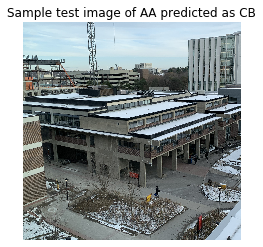

Incorrect...
Votes: {0: 0, 1: 2, 2: 0, 3: 0, 4: 0, 5: 0, 6: 1, 7: 0, 8: 1, 9: 1, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0}


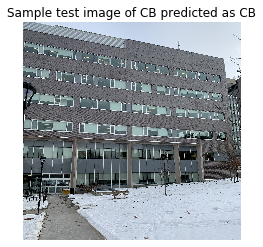

Correct!
Votes: {0: 0, 1: 2, 2: 0, 3: 1, 4: 0, 5: 0, 6: 2, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0}


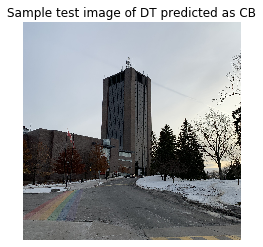

Incorrect...
Votes: {0: 0, 1: 1, 2: 0, 3: 0, 4: 0, 5: 0, 6: 4, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0}


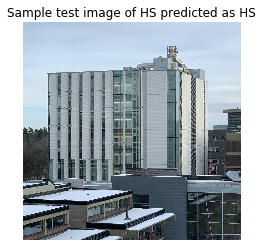

Correct!
Expected that worst recall would be on MC
Expected that best precision would be on MC
Expected total accuracy would be 0.680
Actual total accuracy is 0.500


In [0]:
import numpy as np
from PIL import Image, ExifTags
import matplotlib.pyplot as plt
from glob import glob


# First prepare the model:
prepareModel() # Limited to 5 minutes...

# Load (secret) test data into local Colab environment
!wget https://github.com/jrgreen7/SYSC4906/blob/master/Assignments/Assignment3/Images/SampleImages.zip?raw=true
!unzip SampleImages.zip?raw=true #Should create 4 images
test_images = sorted(glob('SampleImages/*.jpg'))
actual_labels = (buildingCodes[0],buildingCodes[1],buildingCodes[3],buildingCodes[6])

# Classify sample test images:
TP = 0
for imgFname,actual_label in (zip(test_images,actual_labels)):
  pred_label = classifyImage(imgFname) # Predict the label of this image file

  # Plot the image with actual and predicted labels
  # Note that we may have to rotate the image, depending on the 
  # orientation of the camera. Use EXIF tags for this:
  im = Image.open(imgFname)
  for orientation in ExifTags.TAGS.keys() : 
    if ExifTags.TAGS[orientation]=='Orientation' : break 
  exif=dict(im._getexif().items())

  if exif[orientation] == 3 : 
    im=im.rotate(180, expand=True)
  elif exif[orientation] == 6 : 
    im=im.rotate(270, expand=True)
  elif exif[orientation] == 8 : 
    im=im.rotate(90, expand=True)

  im = im.convert('RGB') # May not be necessary?

  plt.title("Sample test image of {0:s} predicted as {1:s}".format(actual_label, pred_label))
  plt.imshow(np.asarray(im))
  plt.axis('off')
  plt.show()

  if (pred_label==actual_label):
    print('Correct!')
    TP += 1
  else:
    print("Incorrect...")

# Print the predicted performance:
print("Expected that worst recall would be on {0:s}".format(worstRecall()))
print("Expected that best precision would be on {0:s}".format(bestPrecision()))
print("Expected total accuracy would be {0:.3f}".format(estimatedAccuracy()))
print("Actual total accuracy is {0:.3f}".format((TP)/(len(test_images))))
